In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from matplotlib import colors as mplcolors
from sys import argv

In [10]:
clustercolors = {0: "tab:blue", 1: "tab:orange", 2: "tab:green", 3: "tab:red", 4: "tab:purple", 5: "tab:brown", 6: "tab:pink", 7: "tab:gray", 8: "tab:olive", 9:"tab:cyan"}

In [11]:
def plt_cluster_img(gx,gy, gx2,gy2, labels):
    img = np.full((gy.max()+1, gx.max()+1), -1)
    for i, l in enumerate(labels):
        img[(gy2[i], gx2[i])] = l
    cmap = mplcolors.ListedColormap(["white", "tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"])
    bounds=[-1, 0,1,2,3,4,5,6,7,8,9,10]
    norm = mplcolors.BoundaryNorm(bounds, cmap.N)
    plt.imshow(img, interpolation='nearest', cmap=cmap, norm=norm)

In [12]:
def print_image(gx,gy, gx2,gy2):
    img = np.zeros((gy.max()+1, gx.max()+1))
    img[(gy2,gx2)] = 1
    plt.imshow(img)
    plt.show()

In [13]:
#region_sum_path = "testresults2/barley101_dr_label0_regionsum.csv"
#regions_path = "testresults2/barley101_roi_images/barley101_dr_label0.csv"
#data_path = "C:\\Users\\kwuellems\\Desktop\\msi-measure-compare-datasets\\barley_101\\barley101.h5"
region_sum_path = "testresults/20120711_Brain-entry_0-analysis_1_mser_label2_regionsum.csv"
regions_path = "testresults/20120711_Brain-entry_0-analysis_1_roi_images/20120711_Brain-entry_0-analysis_1_mser_label2.csv"
data_path = "C:\\Users\\kwuellems\\Desktop\\Test-Datasets\\20120711_Brain-entry_0-analysis_1.h5"


dframe = pd.read_hdf(data_path)
#dframe = dframe.droplevel(["real_x", "real_y"])
dframe = dframe.droplevel(["dataset"])
gx = dframe.index.get_level_values("grid_x")
gy = dframe.index.get_level_values("grid_y")

regions_csv = pd.read_csv(regions_path)
region_keys = np.unique(regions_csv["region_key"])
region_sum_csv = pd.read_csv(region_sum_path)
region_sum_levels = np.unique(region_sum_csv["level"])

In [14]:
for level in region_sum_levels:
    r_gy = region_sum_csv.loc[region_sum_csv["level"]==level]["row_pixel"].values
    r_gx = region_sum_csv.loc[region_sum_csv["level"]==level]["column_pixel"].values
    region_sum_dframe = dframe.loc[list(zip(r_gx, r_gy)), dframe.columns]
    region_sum_dframe.dropna(inplace=True)
    gx2 = region_sum_dframe.index.get_level_values("grid_x")
    gy2 = region_sum_dframe.index.get_level_values("grid_y")
    #plt.figure()
    #print_image(gx2,gy2)

In [15]:
region_dframes = {}

for region_key in region_keys:
    r_gy = regions_csv.loc[regions_csv["region_key"]==region_key]["row_pixel"].values
    r_gx = regions_csv.loc[regions_csv["region_key"]==region_key]["column_pixel"].values
    # For non-OpenMSI
    #region_dframe = dframe.loc[list(zip(r_gx, r_gy)), dframe.columns]
    # For OpenMSI
    region_dframe = dframe.loc[list(zip(r_gy, r_gx)), dframe.columns]
    gx2 = region_dframe.index.get_level_values("grid_x")
    gy2 = region_dframe.index.get_level_values("grid_y")
    if region_dframe.shape[0] < dframe.shape[0] * 0.5:
    #    print_image(gx2,gy2)
        region_dframe.dropna(inplace=True)
        region_dframes[region_key] = region_dframe

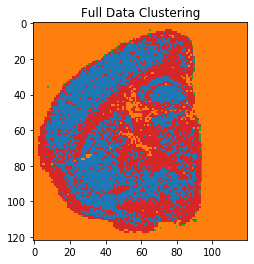

In [16]:
clustering = KMeans(n_clusters=4, random_state=0)
labels = clustering.fit_predict(dframe.values)
plt.figure()
plt.title("Full Data Clustering")
plt_cluster_img(gx,gy, gx,gy, labels)

In [17]:
'''
clustering = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
labels = clustering.fit_predict(dframe.values)
plt.figure()
plt.title("Full Data Clustering")
plt_cluster_img(gx,gy, gx,gy, labels)
'''

'\nclustering = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")\nlabels = clustering.fit_predict(dframe.values)\nplt.figure()\nplt.title("Full Data Clustering")\nplt_cluster_img(gx,gy, gx,gy, labels)\n'

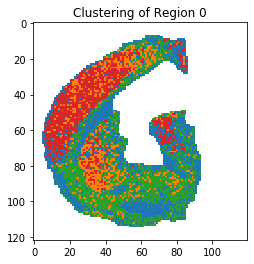

In [18]:
for key, r_dframe in region_dframes.items():
    clustering = KMeans(n_clusters=4, random_state=0)
    labels = clustering.fit_predict(r_dframe.values)
    gx2 = r_dframe.index.get_level_values("grid_x")
    gy2 = r_dframe.index.get_level_values("grid_y")
    plt.figure()
    plt.title("Clustering of Region %i"%key)
    plt_cluster_img(gx,gy, gx2,gy2, labels)

In [19]:
'''
for key, r_dframe in region_dframes.items():
    clustering = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
    labels = clustering.fit_predict(r_dframe.values)
    gx2 = r_dframe.index.get_level_values("grid_x")
    gy2 = r_dframe.index.get_level_values("grid_y")
    plt.figure()
    plt.title("Clustering of Region %i"%key)
    plt_cluster_img(gx,gy, gx2,gy2, labels)
'''

'\nfor key, r_dframe in region_dframes.items():\n    clustering = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")\n    labels = clustering.fit_predict(r_dframe.values)\n    gx2 = r_dframe.index.get_level_values("grid_x")\n    gy2 = r_dframe.index.get_level_values("grid_y")\n    plt.figure()\n    plt.title("Clustering of Region %i"%key)\n    plt_cluster_img(gx,gy, gx2,gy2, labels)\n'